# PART 1

# Necessary Imports

In [49]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline
pyplot.style.use('ggplot')

# Constants

In [50]:
CROSS_VALIDATION_SETS = 5
MAX_K = 10
RANDOM_STATE = 696969
LABEL_NAMES = ['English', 'Urdu', 'Mixed']

# Importing and Splitting Dataset

In [51]:
data = pd.read_csv('dataset.csv')

train = data.sample(frac = 0.8, random_state = RANDOM_STATE)
test = data.drop(train.index)

train = train.to_numpy()
test = test.to_numpy()

train_x = train[:, 1:-1]
train_y = train[:, -1]

test_x = test[:, 1:-1]
test_y = test[:, -1]

Scaling Data

In [52]:
scaler = StandardScaler()
scaler = scaler.fit(train_x)

x_train = scaler.transform(train_x)
x_test = scaler.transform(test_x)

In [53]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,LABEL
0,0,14.443077,-8.036094,-4.077253,-0.274023,-9.003208,-17.048237,-21.399697,-16.263466,3.396780,-12.284809,0.908476,-10.026655,-4.254287,0
1,1,10.219182,1.742702,1.002258,-2.806073,-14.951893,-21.500796,-13.495337,-9.305933,-7.441661,-1.825364,-8.279968,0.422083,-3.959009,0
2,2,13.876193,1.004525,-10.143044,4.769317,-25.268881,-12.703184,-17.730170,-6.543746,-15.888943,-2.577060,-9.861565,1.551331,-3.312003,0
3,3,12.510054,-3.575093,-4.913943,-6.122454,-3.552648,-9.513949,-10.869105,-8.880711,1.368740,-5.230862,-0.560520,-4.260071,-8.647045,0
4,4,16.165702,7.492517,-18.944081,-11.769776,0.360446,-10.676715,-10.353008,7.848967,0.781196,-0.323822,-6.596552,-6.907072,-4.249575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,17375,12.577980,0.449793,8.464243,13.715499,-1.113134,2.922420,-6.761397,2.240919,4.728756,-3.520493,6.343505,1.306161,-3.577430,1
17376,17376,10.832928,5.712939,6.460498,0.479978,-9.827152,-8.491606,-16.057971,-7.821987,-7.278880,-8.225414,-1.474205,-10.781243,-8.982661,1
17377,17377,15.653813,-6.198936,-0.756519,-0.182128,-5.058881,-12.113604,-15.959658,-1.984598,-3.341601,-5.365412,0.485510,-4.278507,-10.961661,1
17378,17378,14.656198,2.442599,-1.116128,-3.430590,-9.892589,-16.597521,-17.447496,-1.346676,-11.960978,-9.395277,-5.763173,-7.353033,-8.212849,1


In [54]:
print("train_x shape:", train_x.shape)
print("train_y shape:", train_y.shape)

train_x shape: (13904, 13)
train_y shape: (13904,)


In [55]:
print("test_x shape:", test_x.shape)
print("test_y shape:", test_y.shape)

test_x shape: (3476, 13)
test_y shape: (3476,)


# Finding Best Value of k

In [56]:
acc_list = list()
f1_list = list()

def knn_cross_validation(k, train_x, train_y, cv_sets):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    preds = cross_val_predict(knn, train_x, train_y, cv=cv_sets)

    acc = accuracy_score(train_y, preds) * 100
    f1 = classification_report(train_y, preds, output_dict=True)["macro avg"]["f1-score"]

    return acc, f1


for i in range(1, MAX_K + 1):
    acc, f1 = knn_cross_validation(i, train_x, train_y, CROSS_VALIDATION_SETS)

    acc_list.append(acc)
    f1_list.append(f1)

    print(f"K = {i} Tested with 5-fold CV")

K = 1 Tested with 5-fold CV
K = 2 Tested with 5-fold CV
K = 3 Tested with 5-fold CV
K = 4 Tested with 5-fold CV
K = 5 Tested with 5-fold CV
K = 6 Tested with 5-fold CV
K = 7 Tested with 5-fold CV
K = 8 Tested with 5-fold CV
K = 9 Tested with 5-fold CV
K = 10 Tested with 5-fold CV


In [57]:
def plot_confusion_matrix(conf_mat, labels):
    classes = list(labels)
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    pyplot.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
    pyplot.show()

def plot(x, y, xlabel, ylabel, title):
    pyplot.plot(x,y)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.title(title)
    pyplot.xticks(x)
    pyplot.show()

x = [i for i in range(1, MAX_K + 1)]

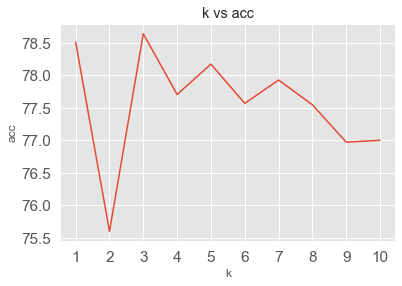

In [58]:
plot(x, acc_list, 'k', 'acc', 'k vs acc')

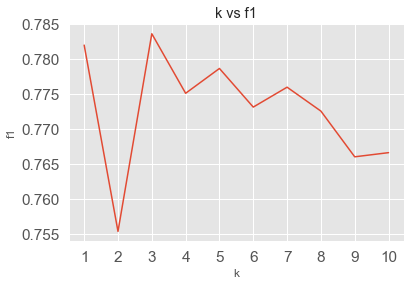

In [59]:
plot(x, f1_list, 'k', 'f1', 'k vs f1')

# Best value ---> k = 3

In [60]:
BEST_K = 3

# 5 Fold CV on K = 3

In [61]:
knn_cv = KNeighborsClassifier(n_neighbors=BEST_K)
knn_cv.fit(train_x, train_y)
cv_scores = cross_val_score(knn_cv, train_x, train_y, cv=CROSS_VALIDATION_SETS)

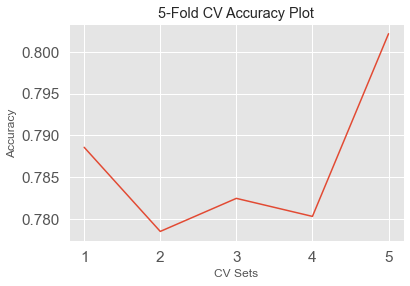

In [62]:
x = [x for x in range(1, CROSS_VALIDATION_SETS + 1)]

plot(x, cv_scores, 'CV Sets', 'Accuracy', '5-Fold CV Accuracy Plot')

# Running For Test Data

In [63]:
def test_knn(k, train_x, train_y, test_x, test_y):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(train_x, train_y)
    preds = knn.predict(test_x)


    cfm = confusion_matrix(test_y, preds)
    stats = classification_report(test_y, preds, target_names=LABEL_NAMES)

    return stats, cfm 

Some Statistics

In [64]:
stats, cfm = test_knn(BEST_K, train_x, train_y, test_x, test_y)
print(stats)

              precision    recall  f1-score   support

     English       0.73      0.81      0.77      1033
        Urdu       0.83      0.77      0.80      1087
       Mixed       0.85      0.84      0.84      1356

    accuracy                           0.81      3476
   macro avg       0.80      0.80      0.80      3476
weighted avg       0.81      0.81      0.81      3476



Confusion Matrix

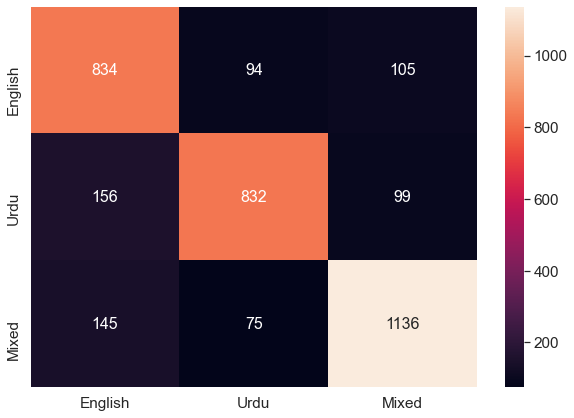

In [65]:
plot_confusion_matrix(cfm, LABEL_NAMES)